In [898]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import datetime
%matplotlib inline

In [899]:
train_data = pd.read_csv("C:/Users/R AMARTYA/Desktop/KDAG/NYTimesBlogTrain.csv")
test_data = pd.read_csv("C:/Users/R AMARTYA/Desktop/KDAG/NYTimesBlogTest.csv")

Merging the train and test data so that we can carry out the preprocessing process oly once.

In [900]:
total= train_data.merge(test_data, how = 'outer')
total.count()

NewsDesk          5994
SectionName       5503
SubsectionName    2226
Headline          8402
Snippet           8389
Abstract          8385
WordCount         8402
PubDate           8402
Popular           6532
UniqueID          8402
dtype: int64

Create additional features:

    "Symbol": question or exclamation mark in the headline.
    "QandA": "Q. and A." phrase in the headline.



In [901]:
total['PubDate'] = pd.to_datetime(total['PubDate'])
total['Weekday'] =total['PubDate'].dt.weekday
total['Hour'] = total['PubDate'].dt.hour
total['Symbol'] =total['Headline'].str.contains(r'\!|\?').astype(int)
total['QandA'] = total['Headline'].str.contains(r'Q\. and A\.').astype(int)

In [902]:
total.head(5)

,NewsDesk,SectionName,SubsectionName,Headline,Snippet,Abstract,WordCount,PubDate,Popular,UniqueID,Weekday,Hour,Symbol,QandA
0,Business,Crosswords/Games,NaN,More School Daze,A puzzle from Ethan Cooper that reminds me tha...,A puzzle from Ethan Cooper that reminds me tha...,508,2014-09-01 22:00:00,1.0,1,0,22,0,0
1,Culture,Arts,NaN,New 96-Page Murakami Work Coming in December,The Strange Library will arrive just three and...,The Strange Library will arrive just three and...,285,2014-09-01 21:14:00,0.0,2,0,21,0,0
2,Business,Business Day,Dealbook,Public Pension Funds Stay Mum on Corporate Expats,Public pension funds have major stakes in Amer...,Public pension funds have major stakes in Amer...,1211,2014-09-01 21:05:00,0.0,3,0,21,0,0
3,Business,Business Day,Dealbook,Boot Camp for Bankers,As they struggle to find new business to bolst...,As they struggle to find new business to bolst...,1405,2014-09-01 20:43:00,1.0,4,0,20,0,0
4,Science,Health,NaN,Of Little Help to Older Knees,Middle-aged and older patients are unlikely to...,Middle-aged and older patients are unlikely to...,181,2014-09-01 18:58:00,1.0,5,0,18,0,0


In [903]:
len(total[total['NewsDesk'].isnull()])

2408

In [904]:
len(total[total['SectionName'].isnull()])

2899

In [905]:
len(total[total['SubsectionName'].isnull()])

6176

Thus there are many gaps which we have to fill before proceeding further

There are many features which can be observed in the data which leadas to 0 popularity.

In [906]:
total.loc[(total['NewsDesk']=='Styles')&(total['SectionName'].isnull()),'NewsDesk'] = 'TStyle'

In [907]:
total[(total['NewsDesk']=='Foreign')&(total['SectionName'].isnull())].head()

,NewsDesk,SectionName,SubsectionName,Headline,Snippet,Abstract,WordCount,PubDate,Popular,UniqueID,Weekday,Hour,Symbol,QandA
11,Foreign,NaN,NaN,1939: German Troops Invade Poland,Highlights from the International Herald Tribu...,Highlights from the International Herald Tribu...,97,2014-09-01 14:39:00,0.0,12,0,14,0,0
20,Foreign,NaN,NaN,1914: Russian Army Scores Victory,Highlights from the International Herald Tribu...,Highlights from the International Herald Tribu...,108,2014-09-01 09:30:00,0.0,21,0,9,0,0
67,Foreign,NaN,NaN,1914: City Prepares for War Wounded,Highlights from the International Herald Tribu...,Highlights from the International Herald Tribu...,101,2014-09-02 13:34:00,0.0,68,1,13,0,0
81,Foreign,NaN,NaN,1889: British Traders in East Africa,Highlights from the International Herald Tribu...,Highlights from the International Herald Tribu...,122,2014-09-02 10:48:00,0.0,82,1,10,0,0
184,Foreign,NaN,NaN,1939: War on Germany Declared,Highlights from the International Herald Tribu...,Highlights from the International Herald Tribu...,79,2014-09-03 07:41:00,0.0,185,2,7,0,0


We can see that all these lead to 0 popularity.

In [908]:
total.loc[(total['NewsDesk']=='Foreign')&(total['SectionName'].isnull()),'NewsDesk']='History'

In [909]:
total.loc[(total['Headline'].str.contains(r'^1[0-9]{3}')),'NewsDesk']='History'
total.loc[(total['NewsDesk']=='History'),'SectionName']='History'
total.loc[(total['NewsDesk']=='History'),'SubsectionName']='History'

In [910]:
total.loc[(total['Headline']=='Daily Clip Report'),'SectionName'] = 'Clip Report'
total.loc[total['Headline']=='Today in Politics','SectionName']='Today in Politics'
total.loc[(total['Headline'].str.contains(r'what we\'re reading', case=False)),'SectionName']='What We\'re reading'
total.loc[(total['Headline'].str.contains('daily report', case=False)),'SectionName']='Daily Report'
total.loc[(total['Headline'].str.contains(r'first draft', case=False)),'SectionName'] = 'First draft'
total.loc[((total['NewsDesk'].isnull()) & (total['Headline'] .str.contains('Magazine', case=False))),'SectionName']='Magazine'

In [911]:
total.loc[total['SectionName'] == 'Clip Report', 'NewsDesk'] = 'Daily'
total.loc[(total['Headline'].str.contains('Pictures of the Day|week in pictures',case=False)),'NewsDesk']='Daily'
total.loc[total['SectionName'] == 'Today in Politics', 'NewsDesk'] = 'Daily'
total.loc[total['SectionName'] == 'What We\'re reading', 'NewsDesk'] = 'Daily'
total.loc[total['SectionName'] == 'First draft', 'NewsDesk'] = 'Daily'
total.loc[total['SectionName'] == 'Daily', 'NewsDesk'] = 'Daily'
total.loc[total['SubsectionName'] == 'Education', 'NewsDesk'] = 'Daily'
total.loc[total['SectionName'] == 'Daily Report', 'NewsDesk'] = 'Daily'

Now Filling the remaining missing entries by observing the patterns.

SectionName To NewsDesk

In [912]:
total.loc[total['SectionName'] == 'Business Day', 'NewsDesk'] = 'Business'
total.loc[total['SectionName'] == 'Opinion','NewsDesk'] = 'OpEd'
total.loc[total['SectionName'] == 'Crosswords/Games', 'NewsDesk'] = 'Business'
total.loc[total['SectionName'] == 'Technology', 'NewsDesk'] = 'Business'
total.loc[total['SectionName'] == 'Arts', 'NewsDesk'] = 'Culture'
total.loc[total['SectionName'] == 'World', 'NewsDesk'] = 'Foreign'
total.loc[total['SectionName'] == 'Health', 'NewsDesk'] = 'Science'
total.loc[total['SectionName'] == 'Style', 'NewsDesk'] = 'Styles'
total.loc[total['SectionName'] == 'Multimedia', 'NewsDesk'] = 'Multimedia'
total.loc[total['SectionName'] == 'Magazine', 'NewsDesk'] = 'Magazine'
total.loc[total['SectionName'] == 'Travel', 'NewsDesk'] = 'Travel'
total.loc[total['SectionName'] == 'Open', 'NewsDesk'] = 'Open'
total.loc[total['SectionName'] == 'N.Y. / Region', 'NewsDesk'] = 'Metro'

NewsDesk to SectionName

In [913]:
total.loc[total['NewsDesk'] == 'TStyle', 'SectionName'] = 'TStyle'
total.loc[total['NewsDesk'] == 'Culture', 'SectionName'] = 'Arts'
total.loc[total['NewsDesk'] == 'OpEd', 'SectionName'] = 'Opinion'
total.loc[total['NewsDesk'] == 'History', 'SectionName'] = 'History'



SectionName to SubsectionName

In [914]:
total.loc[total['SectionName'] == 'Crosswords/Games', 'SubsectionName'] = 'Crosswords/Games'
total.loc[total['SectionName'] == 'Technology', 'SubsectionName'] = 'Technology'
total.loc[total['SectionName'] == 'Technology', 'SubsectionName'] = 'Technology'




NewsDesk to SubsectionName

In [915]:
total.loc[total['NewsDesk'] == 'TStyle','SubsectionName'] = 'TStyle'
total.loc[total['NewsDesk'] == 'Open','SubsectionName'] = 'Open'
total.loc[total['NewsDesk'] == 'Culture','SubsectionName'] = 'Arts'
total.loc[total['NewsDesk'] == 'Daily','SubsectionName'] = 'Rubric'
total.loc[total['NewsDesk'] == 'Magazine','SubsectionName'] = 'Magazine'
total.loc[total['NewsDesk'] == 'Metro','SubsectionName'] = 'Metro'
total.loc[total['NewsDesk'] == 'Multimedia','SubsectionName'] = 'Multimedia'
total.loc[total['NewsDesk'] == 'OpEd','SubsectionName'] = 'OpEd'
total.loc[total['NewsDesk'] == 'Culture','SubsectionName'] = 'Arts'
total.loc[total['NewsDesk'] == 'Science','SubsectionName'] = 'Science'
total.loc[total['NewsDesk'] == 'Sports','SubsectionName'] = 'Sports'
total.loc[total['NewsDesk'] == 'Styles','SubsectionName'] = 'Styles'
total.loc[total['NewsDesk'] == 'Travel','SubsectionName'] = 'Travel'
total.loc[total['NewsDesk'] == 'History','SubsectionName'] = 'History'

In [916]:
total.head()

,NewsDesk,SectionName,SubsectionName,Headline,Snippet,Abstract,WordCount,PubDate,Popular,UniqueID,Weekday,Hour,Symbol,QandA
0,Business,Crosswords/Games,Crosswords/Games,More School Daze,A puzzle from Ethan Cooper that reminds me tha...,A puzzle from Ethan Cooper that reminds me tha...,508,2014-09-01 22:00:00,1.0,1,0,22,0,0
1,Culture,Arts,Arts,New 96-Page Murakami Work Coming in December,The Strange Library will arrive just three and...,The Strange Library will arrive just three and...,285,2014-09-01 21:14:00,0.0,2,0,21,0,0
2,Business,Business Day,Dealbook,Public Pension Funds Stay Mum on Corporate Expats,Public pension funds have major stakes in Amer...,Public pension funds have major stakes in Amer...,1211,2014-09-01 21:05:00,0.0,3,0,21,0,0
3,Business,Business Day,Dealbook,Boot Camp for Bankers,As they struggle to find new business to bolst...,As they struggle to find new business to bolst...,1405,2014-09-01 20:43:00,1.0,4,0,20,0,0
4,Science,Health,Science,Of Little Help to Older Knees,Middle-aged and older patients are unlikely to...,Middle-aged and older patients are unlikely to...,181,2014-09-01 18:58:00,1.0,5,0,18,0,0


In [917]:
len(total[total['SubsectionName'].isnull()])

1345

In [918]:
len(total[total['SectionName'].isnull()])

1337

In [919]:
len(total[total['NewsDesk'].isnull()])

1327

Still we have 1327 missing entries in NewsDesk

Thus to fill them, we create clusters by K-Means Clustering.

In [920]:
from sklearn.cluster import KMeans
from sklearn.feature_extraction.text import TfidfVectorizer
from scipy.spatial.distance import cdist

In [921]:
nans = total.loc[total['NewsDesk'].isnull()]
words = list(nans.apply(lambda x:'%s' % (x['Abstract']),axis=1))
tfv = TfidfVectorizer(min_df=0.005,  max_features=None, 
        strip_accents='unicode', analyzer='word',token_pattern=r'\w{1,}',
        ngram_range=(1, 2), use_idf=1,smooth_idf=1,sublinear_tf=1,
        stop_words = 'english')
X = tfv.fit_transform(words)

First we calculate the ideal number of clusters by elbow method. Here it comes to be approximately equal to 5.

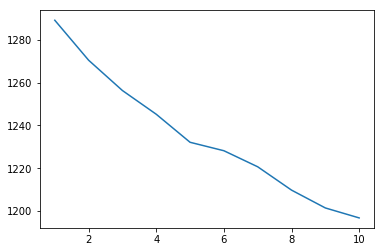

In [922]:
w=[]
for i in range(1,11):
    kmeans= KMeans(n_clusters=i, init='k-means++',random_state=0)
    kmeans=kmeans.fit(X)
    w.append(kmeans.inertia_ )
plt.plot(range(1,11),w)
plt.show()   
%matplotlib inline

In [923]:
kmeans= KMeans(n_clusters=5, init='k-means++',random_state=0).fit(X.toarray())
total.loc[total['NewsDesk'].isnull(), 'cluster'] = kmeans.labels_

In [924]:
total.loc[total['cluster'] == 1].head()

,NewsDesk,SectionName,SubsectionName,Headline,Snippet,Abstract,WordCount,PubDate,Popular,UniqueID,Weekday,Hour,Symbol,QandA,cluster
1454,NaN,NaN,NaN,Push for New Climate Change Pact as U.N. Summi...,The United Nations will convene a summit meeti...,The United Nations will convene a summit meeti...,166,2014-09-21 16:23:00,0.0,1455,6,16,0,0,1.0
1458,NaN,NaN,NaN,President Hassan Rouhani of Iran - U.N. Genera...,How will President Rouhanis appeal to the Unit...,How will President Rouhanis appeal to the Unit...,402,2014-09-21 15:14:00,0.0,1459,6,15,0,0,1.0
1461,NaN,NaN,NaN,President Goodluck Jonathan of Nigeria - U.N. ...,President Goodluck Jonathan of Nigeria is sche...,President Goodluck Jonathan of Nigeria is sche...,281,2014-09-21 15:01:00,0.0,1462,6,15,0,0,1.0
1462,NaN,NaN,NaN,What Nawaz Sharif of Pakistan Seeks,Since Prime Minister Nawaz Sharif of Pakistan ...,Since Prime Minister Nawaz Sharif of Pakistan ...,331,2014-09-21 15:00:00,0.0,1463,6,15,0,0,1.0
1488,NaN,NaN,NaN,What to Expect From Narendra Modi at the Unite...,"Since taking power in May, Prime Minister Nare...","Since taking power in May, Prime Minister Nare...",513,2014-09-22 20:30:00,1.0,1489,0,20,0,0,1.0


In [925]:
cluster_to = {}
cluster_to['NewsDesk'] = {4: 'OpEd', 2: 'National', 3: 'OpEd', 1: 'Foreign',0:'Metro'}
cluster_to['SectionName'] = {4: 'Opinion', 2: 'U.S.', 3: 'Opinion', 1: 'Not_Asia_Pacific',0:'N.Y./Region'}
cluster_to['SubsectionName'] = {4: 'OpEd', 2: 'Politics', 3: 'OpEd', 1: 'Not_Asia_Pacific',0:'NYT'}

We check for each cluster manually and accordingly assign each cluster some NewsDesk,SectionName and SubsectionName.

In [926]:
for key in cluster_to:
    for key2 in cluster_to[key]:
        total.loc[(total['cluster'] == key2) & (nans['NewsDesk'].isnull()), key] = cluster_to[key][key2]

In [927]:
total.loc[total['cluster'] == 2].head()

,NewsDesk,SectionName,SubsectionName,Headline,Snippet,Abstract,WordCount,PubDate,Popular,UniqueID,Weekday,Hour,Symbol,QandA,cluster
662,National,U.S.,Politics,Preparing for Obama's Speech,A look at how The Times planned for President ...,A look at how The Times planned for President ...,560,2014-09-10 18:16:00,0.0,663,2,18,0,0,2.0
687,National,U.S.,Politics,Highlights From Obama's Speech on ISIS,Coverage of President Obamas speech explaining...,Coverage of President Obamas speech explaining...,1842,2014-09-10 15:01:00,0.0,688,2,15,0,0,2.0
1456,National,U.S.,Politics,President Mahmoud Abbas Preps for U.N. Speech,President Mahmoud Abbas of the Palestinian Aut...,President Mahmoud Abbas of the Palestinian Aut...,317,2014-09-21 15:18:00,0.0,1457,6,15,0,0,2.0
1529,National,U.S.,Politics,Obama Not Bailing on a Judicial Nominee,Obama is not pulling back on his support of Ju...,Obama is not pulling back on his support of Ju...,145,2014-09-22 14:09:00,0.0,1530,0,14,0,0,2.0
1641,National,U.S.,Politics,Chelsea Clinton Offered a Presidential Motorca...,"President Obama, speaking at the Clinton Globa...","President Obama, speaking at the Clinton Globa...",71,2014-09-23 16:04:00,0.0,1642,1,16,0,0,2.0


In [928]:
total.drop('cluster', axis=1, inplace=True)

In [929]:
len(total[total['NewsDesk'].isnull()])

0

In [930]:
len(total[total['SectionName'].isnull()])

13

In [931]:
len(total[total['SubsectionName'].isnull()])

18

Now also we have 18 missing values in SubsectionName.Thus checking manually now.

In [932]:
total.loc[total['NewsDesk'] == 'Foreign','SubsectionName'] = 'Asia Pacific'

In [933]:
total.loc[total['NewsDesk'] == 'Sports','SectionName'] = 'Sports'
total.loc[total['NewsDesk'] == 'Science','SectionName'] = 'Health'

In [934]:
total.loc[total['NewsDesk'] == 'National','SectionName'] = 'U.S.'
total.loc[total['NewsDesk'] == 'National','SubsectionName'] = 'Politics'

In [935]:
total.loc[(total['Headline'].str.contains('Firefox makes yahoo|music start to take shape|hollywood makes Robots',case=False)),'SectionName']='Technology'
total.loc[(total['Headline'].str.contains('McCloskey|Seattle|Fracking and gambling',case=False)),'SectionName']='Business Day'
total.loc[(total['SectionName']=='Technology'),'SubsectionName']='Technology'
total.loc[(total['SectionName']=='Business Day'),'SubsectionName']='Dealbook'



In [936]:
len(total[total['NewsDesk'].isnull()])

0

In [937]:
len(total[total['SectionName'].isnull()])

0

In [938]:
len(total[total['SubsectionName'].isnull()])

0

In [939]:
total.head()

,NewsDesk,SectionName,SubsectionName,Headline,Snippet,Abstract,WordCount,PubDate,Popular,UniqueID,Weekday,Hour,Symbol,QandA
0,Business,Crosswords/Games,Crosswords/Games,More School Daze,A puzzle from Ethan Cooper that reminds me tha...,A puzzle from Ethan Cooper that reminds me tha...,508,2014-09-01 22:00:00,1.0,1,0,22,0,0
1,Culture,Arts,Arts,New 96-Page Murakami Work Coming in December,The Strange Library will arrive just three and...,The Strange Library will arrive just three and...,285,2014-09-01 21:14:00,0.0,2,0,21,0,0
2,Business,Business Day,Dealbook,Public Pension Funds Stay Mum on Corporate Expats,Public pension funds have major stakes in Amer...,Public pension funds have major stakes in Amer...,1211,2014-09-01 21:05:00,0.0,3,0,21,0,0
3,Business,Business Day,Dealbook,Boot Camp for Bankers,As they struggle to find new business to bolst...,As they struggle to find new business to bolst...,1405,2014-09-01 20:43:00,1.0,4,0,20,0,0
4,Science,Health,Science,Of Little Help to Older Knees,Middle-aged and older patients are unlikely to...,Middle-aged and older patients are unlikely to...,181,2014-09-01 18:58:00,1.0,5,0,18,0,0


In [940]:
from sklearn.feature_extraction import DictVectorizer

old_columns = total.columns
cat_cols = ['NewsDesk', 'SectionName', 'SubsectionName']
temp_dict = total[cat_cols].to_dict(orient="records")
vec = DictVectorizer()
vec_arr = vec.fit_transform(temp_dict).toarray()    
new_total = pd.DataFrame(vec_arr).convert_objects(convert_numeric=True)
new_total.index = total.index
new_total.columns = vec.get_feature_names()
columns_to_add = [col for col in old_columns if col not in cat_cols]
new_total[columns_to_add] = total[columns_to_add]
new_total.head()

C:\Users\R AMARTYA\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use DataFrame.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  


,NewsDesk=Business,NewsDesk=Culture,NewsDesk=Daily,NewsDesk=Foreign,NewsDesk=History,NewsDesk=Magazine,NewsDesk=Metro,NewsDesk=Multimedia,NewsDesk=National,NewsDesk=OpEd,...,Snippet,Abstract,WordCount,PubDate,Popular,UniqueID,Weekday,Hour,Symbol,QandA
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,A puzzle from Ethan Cooper that reminds me tha...,A puzzle from Ethan Cooper that reminds me tha...,508,2014-09-01 22:00:00,1.0,1,0,22,0,0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,The Strange Library will arrive just three and...,The Strange Library will arrive just three and...,285,2014-09-01 21:14:00,0.0,2,0,21,0,0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,Public pension funds have major stakes in Amer...,Public pension funds have major stakes in Amer...,1211,2014-09-01 21:05:00,0.0,3,0,21,0,0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,As they struggle to find new business to bolst...,As they struggle to find new business to bolst...,1405,2014-09-01 20:43:00,1.0,4,0,20,0,0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,Middle-aged and older patients are unlikely to...,Middle-aged and older patients are unlikely to...,181,2014-09-01 18:58:00,1.0,5,0,18,0,0


Separating the train and test data

In [941]:
train = new_total[new_total['UniqueID'] <= 6532]
test = new_total[new_total['UniqueID'] > 6532]

In [942]:
train.head()

,NewsDesk=Business,NewsDesk=Culture,NewsDesk=Daily,NewsDesk=Foreign,NewsDesk=History,NewsDesk=Magazine,NewsDesk=Metro,NewsDesk=Multimedia,NewsDesk=National,NewsDesk=OpEd,...,Snippet,Abstract,WordCount,PubDate,Popular,UniqueID,Weekday,Hour,Symbol,QandA
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,A puzzle from Ethan Cooper that reminds me tha...,A puzzle from Ethan Cooper that reminds me tha...,508,2014-09-01 22:00:00,1.0,1,0,22,0,0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,The Strange Library will arrive just three and...,The Strange Library will arrive just three and...,285,2014-09-01 21:14:00,0.0,2,0,21,0,0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,Public pension funds have major stakes in Amer...,Public pension funds have major stakes in Amer...,1211,2014-09-01 21:05:00,0.0,3,0,21,0,0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,As they struggle to find new business to bolst...,As they struggle to find new business to bolst...,1405,2014-09-01 20:43:00,1.0,4,0,20,0,0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,Middle-aged and older patients are unlikely to...,Middle-aged and older patients are unlikely to...,181,2014-09-01 18:58:00,1.0,5,0,18,0,0


In [943]:
Xcols = train.columns
Xcols = [x for x in Xcols if not x in ('Headline', 'Snippet', 'Abstract', 'PubDate', 'UniqueID', 'Popular', 'Q&A')]

In [944]:
train.head()

,NewsDesk=Business,NewsDesk=Culture,NewsDesk=Daily,NewsDesk=Foreign,NewsDesk=History,NewsDesk=Magazine,NewsDesk=Metro,NewsDesk=Multimedia,NewsDesk=National,NewsDesk=OpEd,...,Snippet,Abstract,WordCount,PubDate,Popular,UniqueID,Weekday,Hour,Symbol,QandA
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,A puzzle from Ethan Cooper that reminds me tha...,A puzzle from Ethan Cooper that reminds me tha...,508,2014-09-01 22:00:00,1.0,1,0,22,0,0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,The Strange Library will arrive just three and...,The Strange Library will arrive just three and...,285,2014-09-01 21:14:00,0.0,2,0,21,0,0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,Public pension funds have major stakes in Amer...,Public pension funds have major stakes in Amer...,1211,2014-09-01 21:05:00,0.0,3,0,21,0,0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,As they struggle to find new business to bolst...,As they struggle to find new business to bolst...,1405,2014-09-01 20:43:00,1.0,4,0,20,0,0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,Middle-aged and older patients are unlikely to...,Middle-aged and older patients are unlikely to...,181,2014-09-01 18:58:00,1.0,5,0,18,0,0


Now train on 80% of the data and calclate accuracy onrest 20%.

In [945]:
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import GradientBoostingClassifier


In [946]:
train_features = train[Xcols]
train_target = train['Popular']

In [947]:
from sklearn import metrics
from sklearn.cross_validation import train_test_split

In [948]:
train_x, test_x, train_y, test_y = train_test_split(train_features, train_target, test_size=0.20, random_state=0)
print (train_features.shape, train_target.shape)
print (train_x.shape, train_y.shape)
print (test_x.shape, test_y.shape)

(6532, 64) (6532,)
(5225, 64) (5225,)
(1307, 64) (1307,)


RandomForestClassifier

In [949]:
clf= RandomForestClassifier(n_estimators=1000)

In [950]:
clf = clf.fit(train_x, train_y)
predict_y = clf.predict(test_x)
from sklearn.metrics import accuracy_score
print ("Random Forest = %.2f" % (accuracy_score(test_y, predict_y)))


Random Forest = 0.88


KNN Classifier

In [951]:
clf1=KNeighborsClassifier(n_neighbors = 3)
clf1 = clf1.fit(train_x, train_y)
predict_y = clf1.predict(test_x)
from sklearn.metrics import accuracy_score
print ("KNN= %.2f" % (accuracy_score(test_y, predict_y)))

KNN= 0.82


Decision Tree Classifier

In [952]:
clf2= DecisionTreeClassifier()
clf2 = clf2.fit(train_x, train_y)
predict_y = clf2.predict(test_x)
from sklearn.metrics import accuracy_score
print ("Decision tree Accuracy = %.2f" % (accuracy_score(test_y, predict_y)))

Decision tree Accuracy = 0.85


SVC Classifier

In [953]:
clf3 = SVC()
clf3.fit(train_x, train_y)
predict_y = clf3.predict(test_x)
print ("SVC Accuracy = %.2f" % (accuracy_score(test_y, predict_y)))

SVC Accuracy = 0.82


Logistic Regression Classifier

In [954]:
clf4 = LogisticRegression()
clf4.fit(train_x, train_y)
predict_y = clf4.predict(test_x)
print ("Regression Accuracy = %.2f" % (accuracy_score(test_y, predict_y)))

Regression Accuracy = 0.86


Gradient Boosting Classifier

In [955]:
clf5 = GradientBoostingClassifier(n_estimators=3000,learning_rate=0.005)
clf5.fit(train_x, train_y)
predict_y = clf5.predict(test_x)
print ("GBC Accuracy = %.2f" % (accuracy_score(test_y, predict_y)))

GBC Accuracy = 0.88


Now predicting for the test data

In [956]:
probsRF = clf.predict_proba(test[Xcols])[:,1]
probsGBC =clf5.predict_proba(test[Xcols])[:,1]
test['Popular'] = (0.6*probsGBC+0.4*probsRF)
test['UniqueID'] = test['UniqueID'].astype(int)


C:\Users\R AMARTYA\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\R AMARTYA\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [957]:
test.head(10)

,NewsDesk=Business,NewsDesk=Culture,NewsDesk=Daily,NewsDesk=Foreign,NewsDesk=History,NewsDesk=Magazine,NewsDesk=Metro,NewsDesk=Multimedia,NewsDesk=National,NewsDesk=OpEd,...,Snippet,Abstract,WordCount,PubDate,Popular,UniqueID,Weekday,Hour,Symbol,QandA
6532,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,The backstage tale won two awards; Citizenfour...,The backstage tale won two awards; Citizenfour...,111,2014-12-01 22:45:24,0.017726,6533,0,22,0,0
6533,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,"In the fall season finale, a question of where...","In the fall season finale, a question of where...",558,2014-12-01 22:01:34,0.084679,6534,0,22,0,0
6534,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,In which Timothy Polin reveals his potty mouth.,In which Timothy Polin reveals his potty mouth.,788,2014-12-01 22:00:26,0.980934,6535,0,22,0,0
6535,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,The debate about pay for Wall Street executive...,The debate about pay for Wall Street executive...,915,2014-12-01 21:04:13,0.323425,6536,0,21,0,0
6536,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,Short-term psychotherapy may be an effective w...,Short-term psychotherapy may be an effective w...,213,2014-12-01 19:13:20,0.193257,6537,0,19,0,0
6537,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,What I hadnt considered before my fathers hear...,What I hadnt considered before my fathers hear...,938,2014-12-01 19:05:12,0.916946,6538,0,19,0,0
6538,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,"Sometimes, being a primary care doctor isnt en...","Sometimes, being a primary care doctor isnt en...",1336,2014-12-01 19:00:16,0.676494,6539,0,19,0,0
6539,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,How can the development and testing of Ebola d...,How can the development and testing of Ebola d...,2644,2014-12-01 18:22:40,0.109538,6540,0,18,0,0
6540,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,"A guide to the installations, galleries and em...","A guide to the installations, galleries and em...",752,2014-12-01 18:15:56,0.023748,6541,0,18,0,0
6541,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,Chief Justice John G. Roberts Jr. is well know...,Chief Justice John G. Roberts Jr. is well know...,99,2014-12-01 18:04:11,0.109019,6542,0,18,0,0


In [959]:
test.to_csv('15.071x .csv', columns=['UniqueID', 'Popular'], header=['UniqueID', 'Probability1'], index=False)